DATASET CLEANING

The main objective of this part are:
1. Get familliar with the datasaet
2. Discover data quality problems
3. Fix these problems

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [96]:
df = pd.read_csv('raw_data.csv', sep= ';')
print(df.shape)
print(df.columns)
df.head(20)

(12276, 123)
Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch',
       ...
       'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15',
       'opp_deathsat15'],
      dtype='object', length=123)


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DATA PROFILING

Let's visualise the amount of missing data with some plots

In [97]:
df.isna().sum()

gameid                  0
datacompleteness        0
url                 10032
league                  0
year                    0
                    ...  
assistsat15          2244
deathsat15           2244
opp_killsat15        2244
opp_assistsat15      2244
opp_deathsat15       2244
Length: 123, dtype: int64

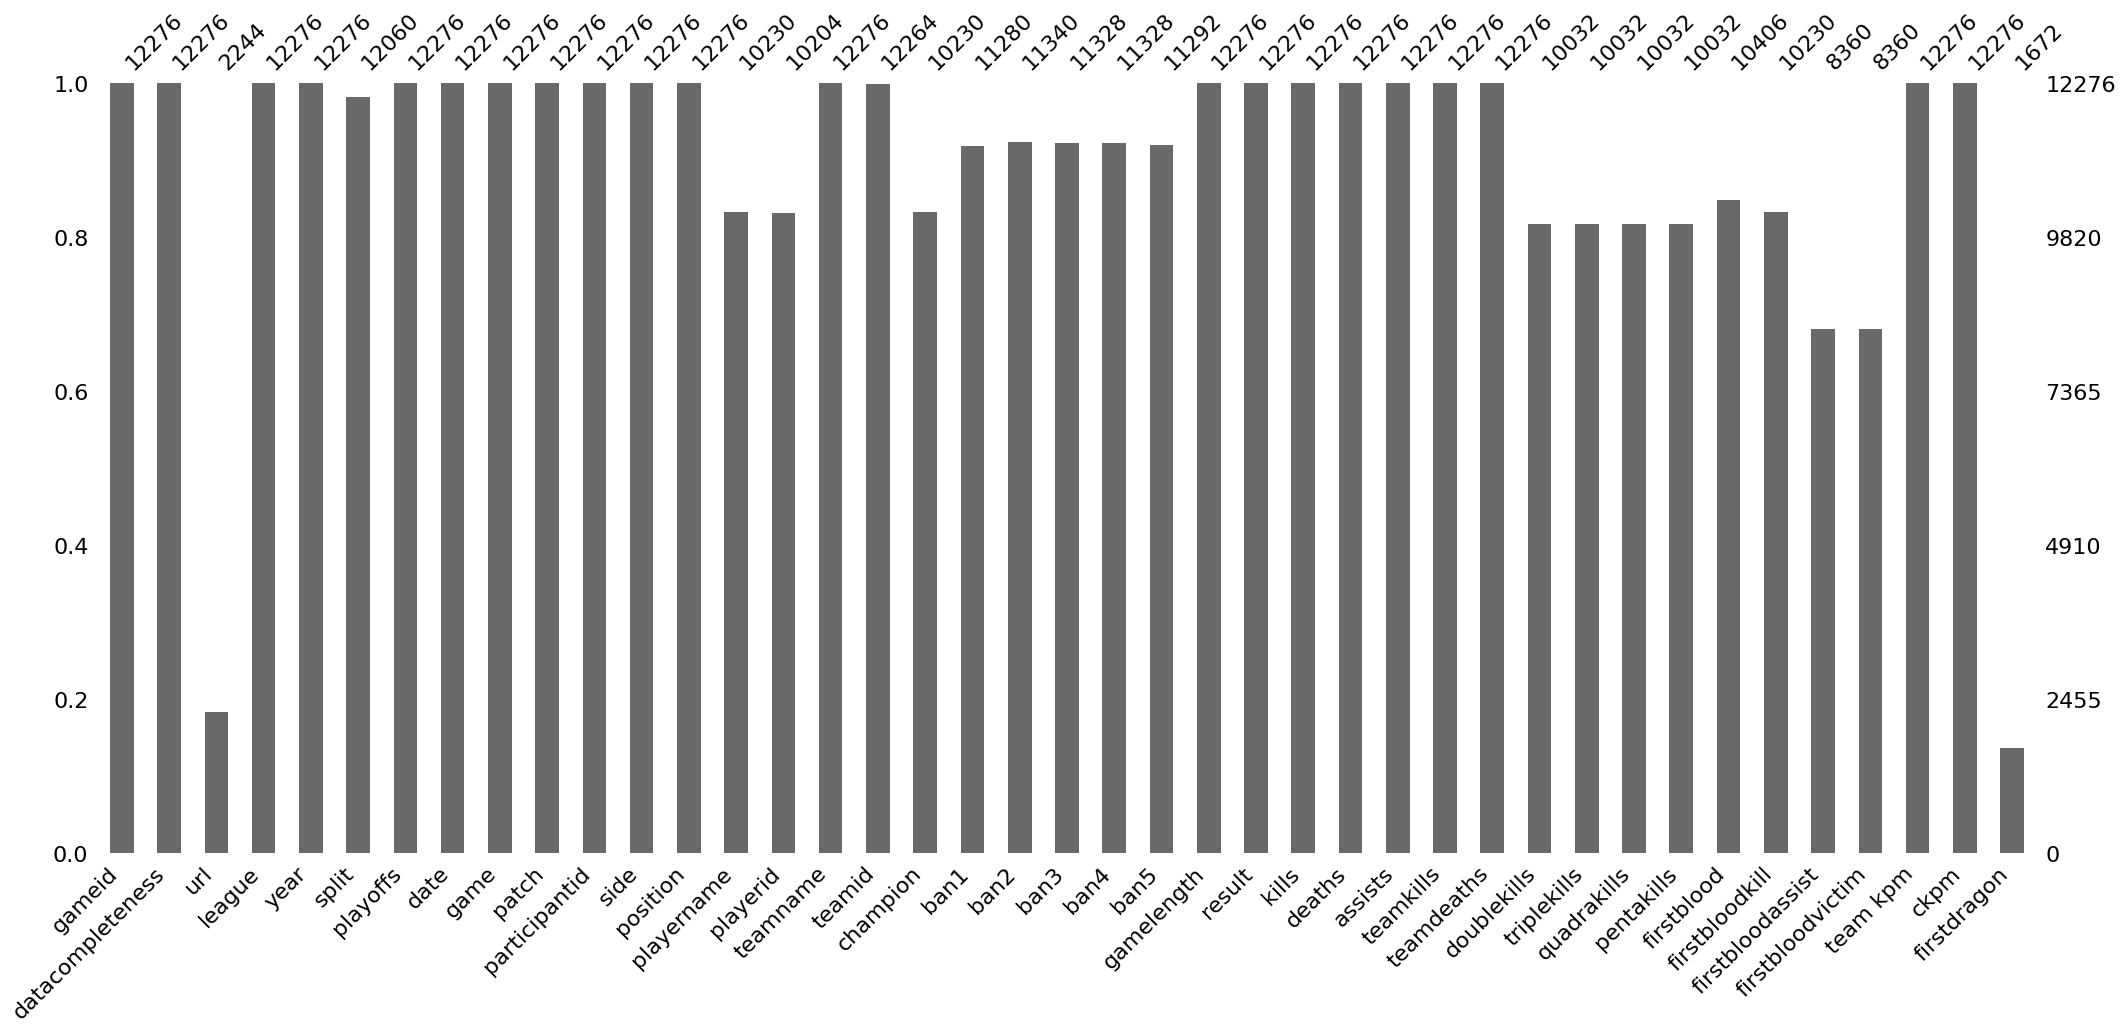

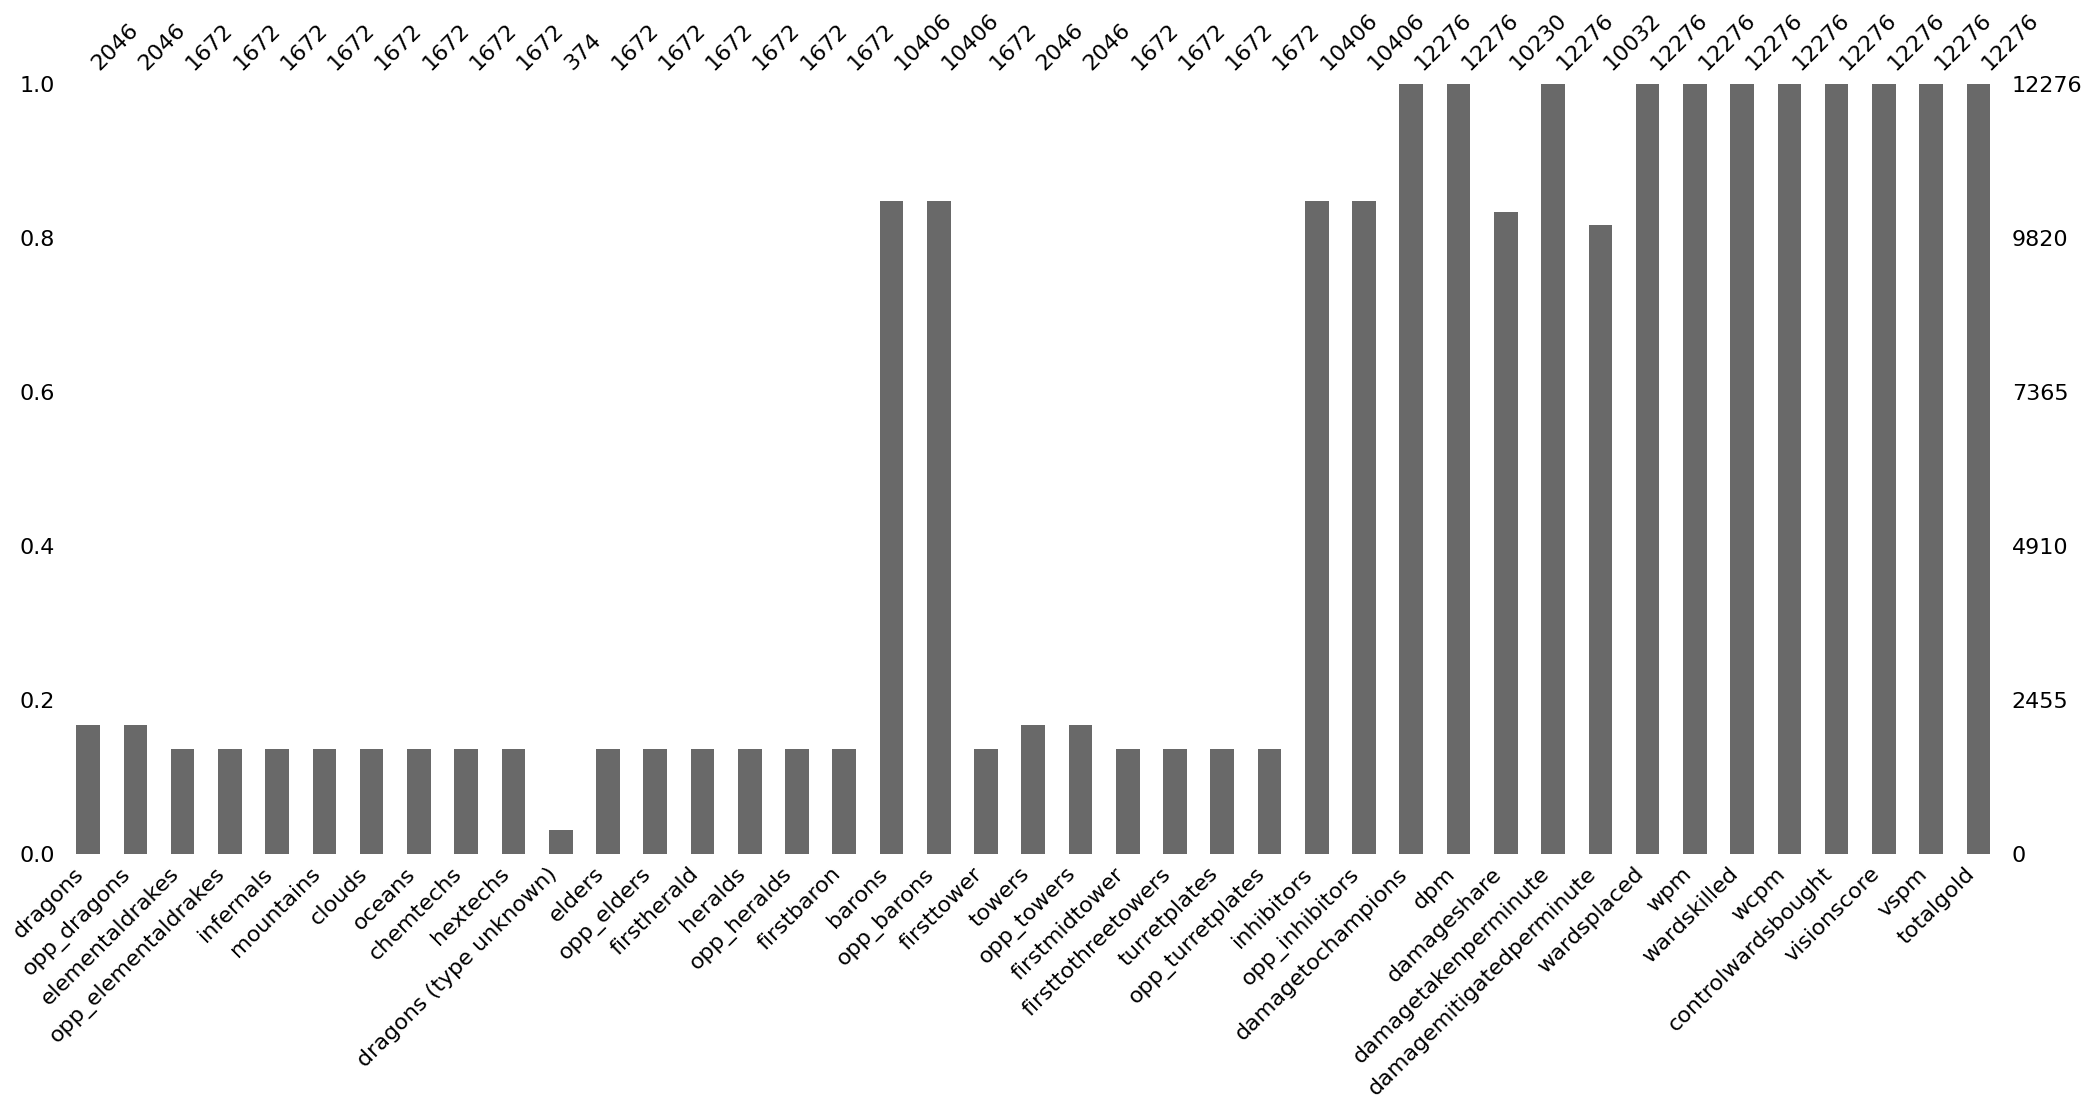

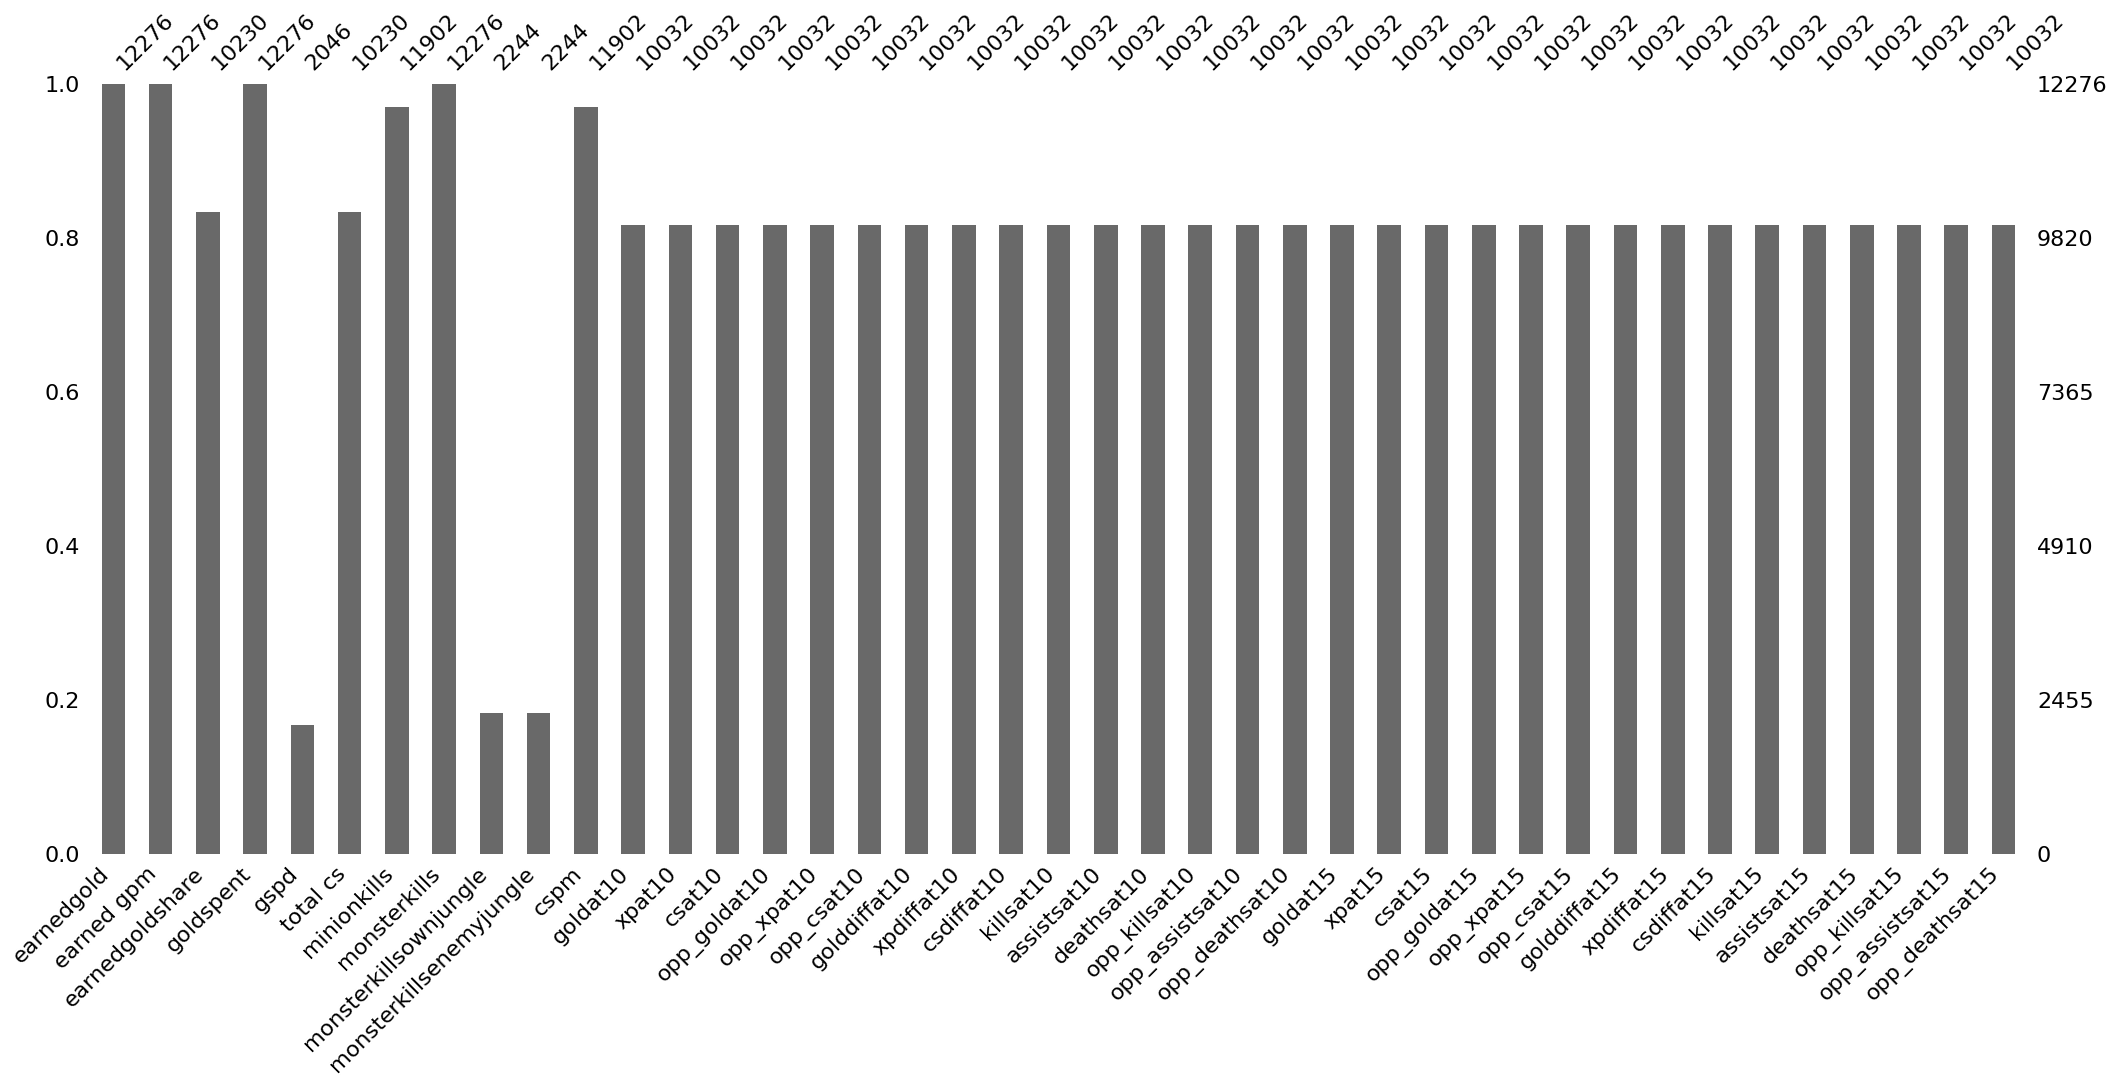

In [98]:
msno.bar(df.iloc[:, 0:41])
plt.show()
msno.bar(df.iloc[:, 41:82])
plt.show()
msno.bar(df.iloc[:, 82:])
plt.show()

Observations

1. There's a lot of missing values
2. The rows for individual players can be removed as there are unsessesary since there already are rows that agregate the stats for the teams
3. Luckily, the columns that are the most promising are either complete or 80% complete
4. There's a lot of columns that represent different side of the same coin (ie. kills, deaths)

Impact
1. Drop metadata colums and not-impactful stats
2. Drop non-team rows
3. Impute the missing values

In [99]:
df_teams = df[df['position'] == 'team']
df_teams.head()
df_teams['position'].value_counts()

position
team    2046
Name: count, dtype: int64

Since we only have rows with agregate values for teams, lets see if NaNs structure has changed

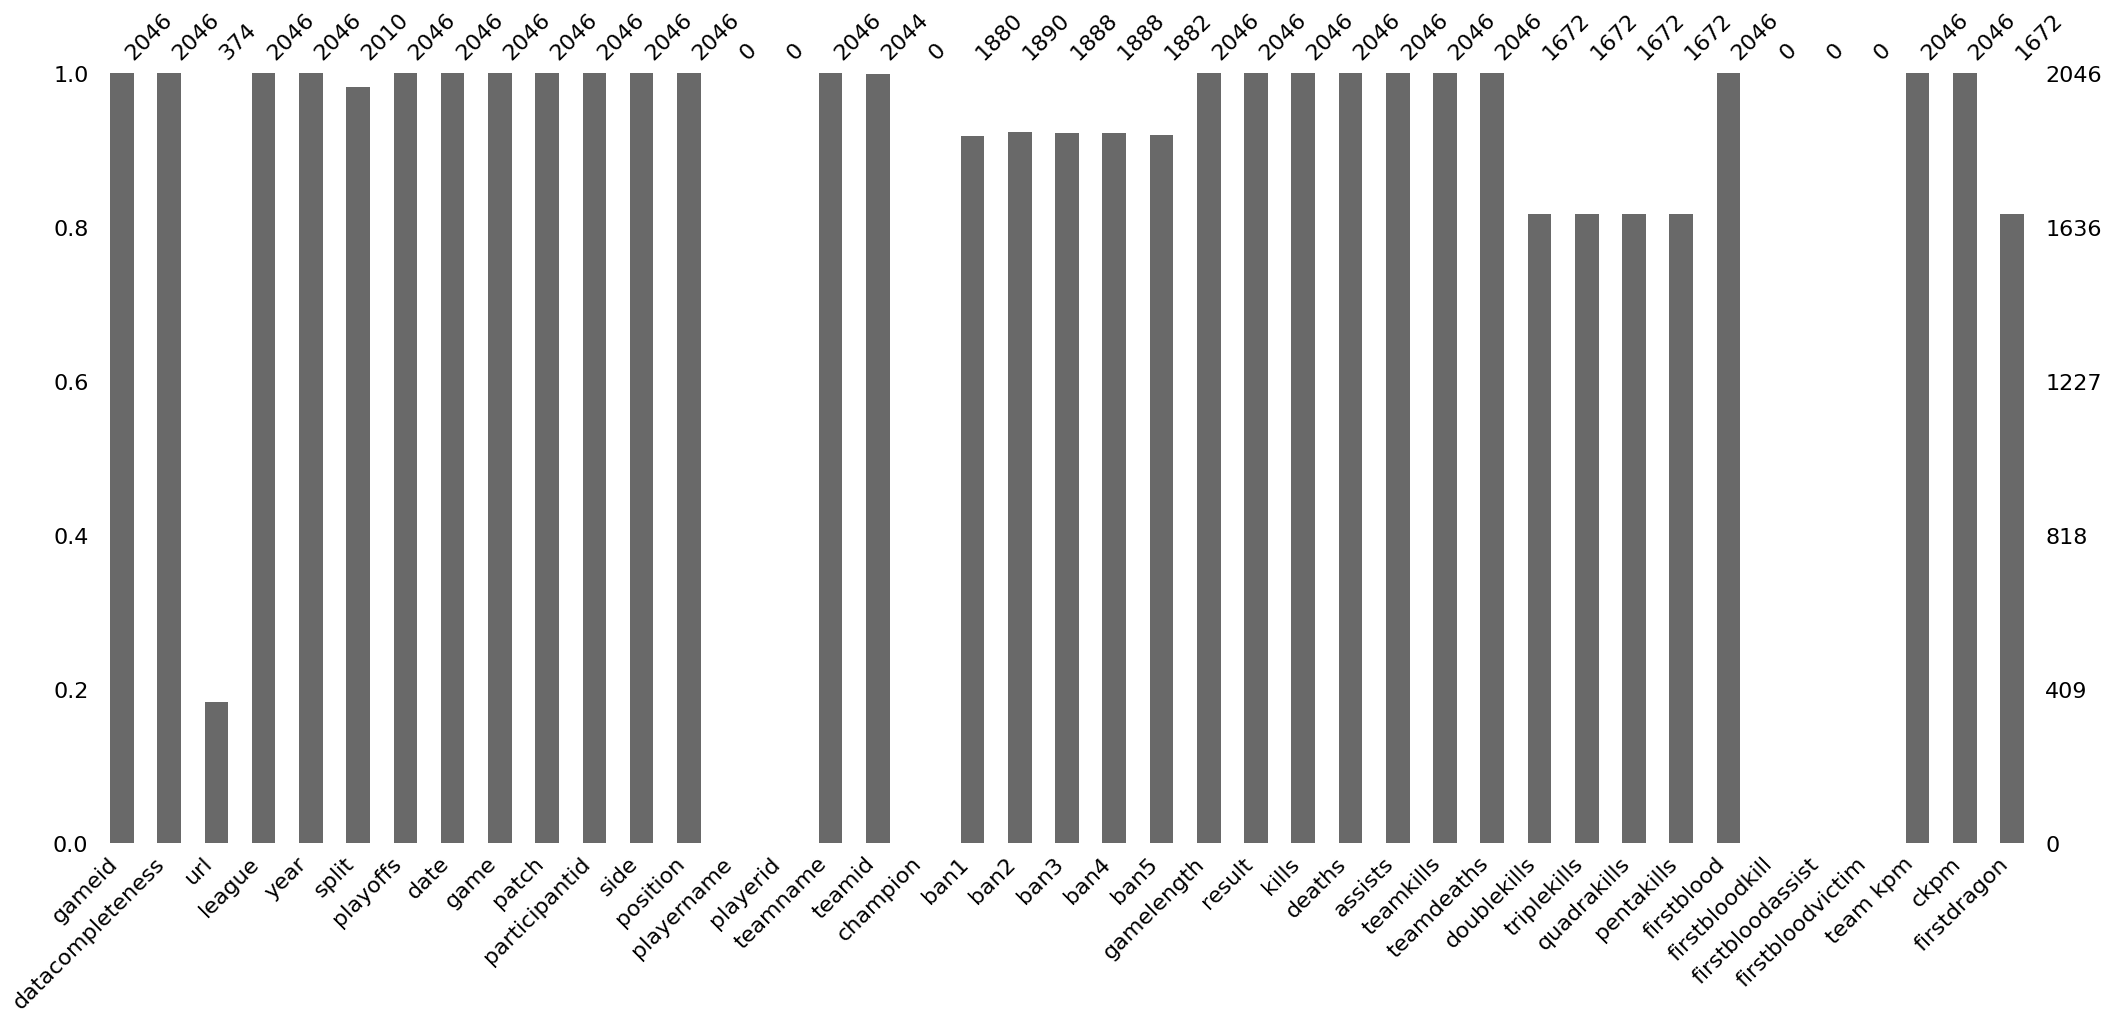

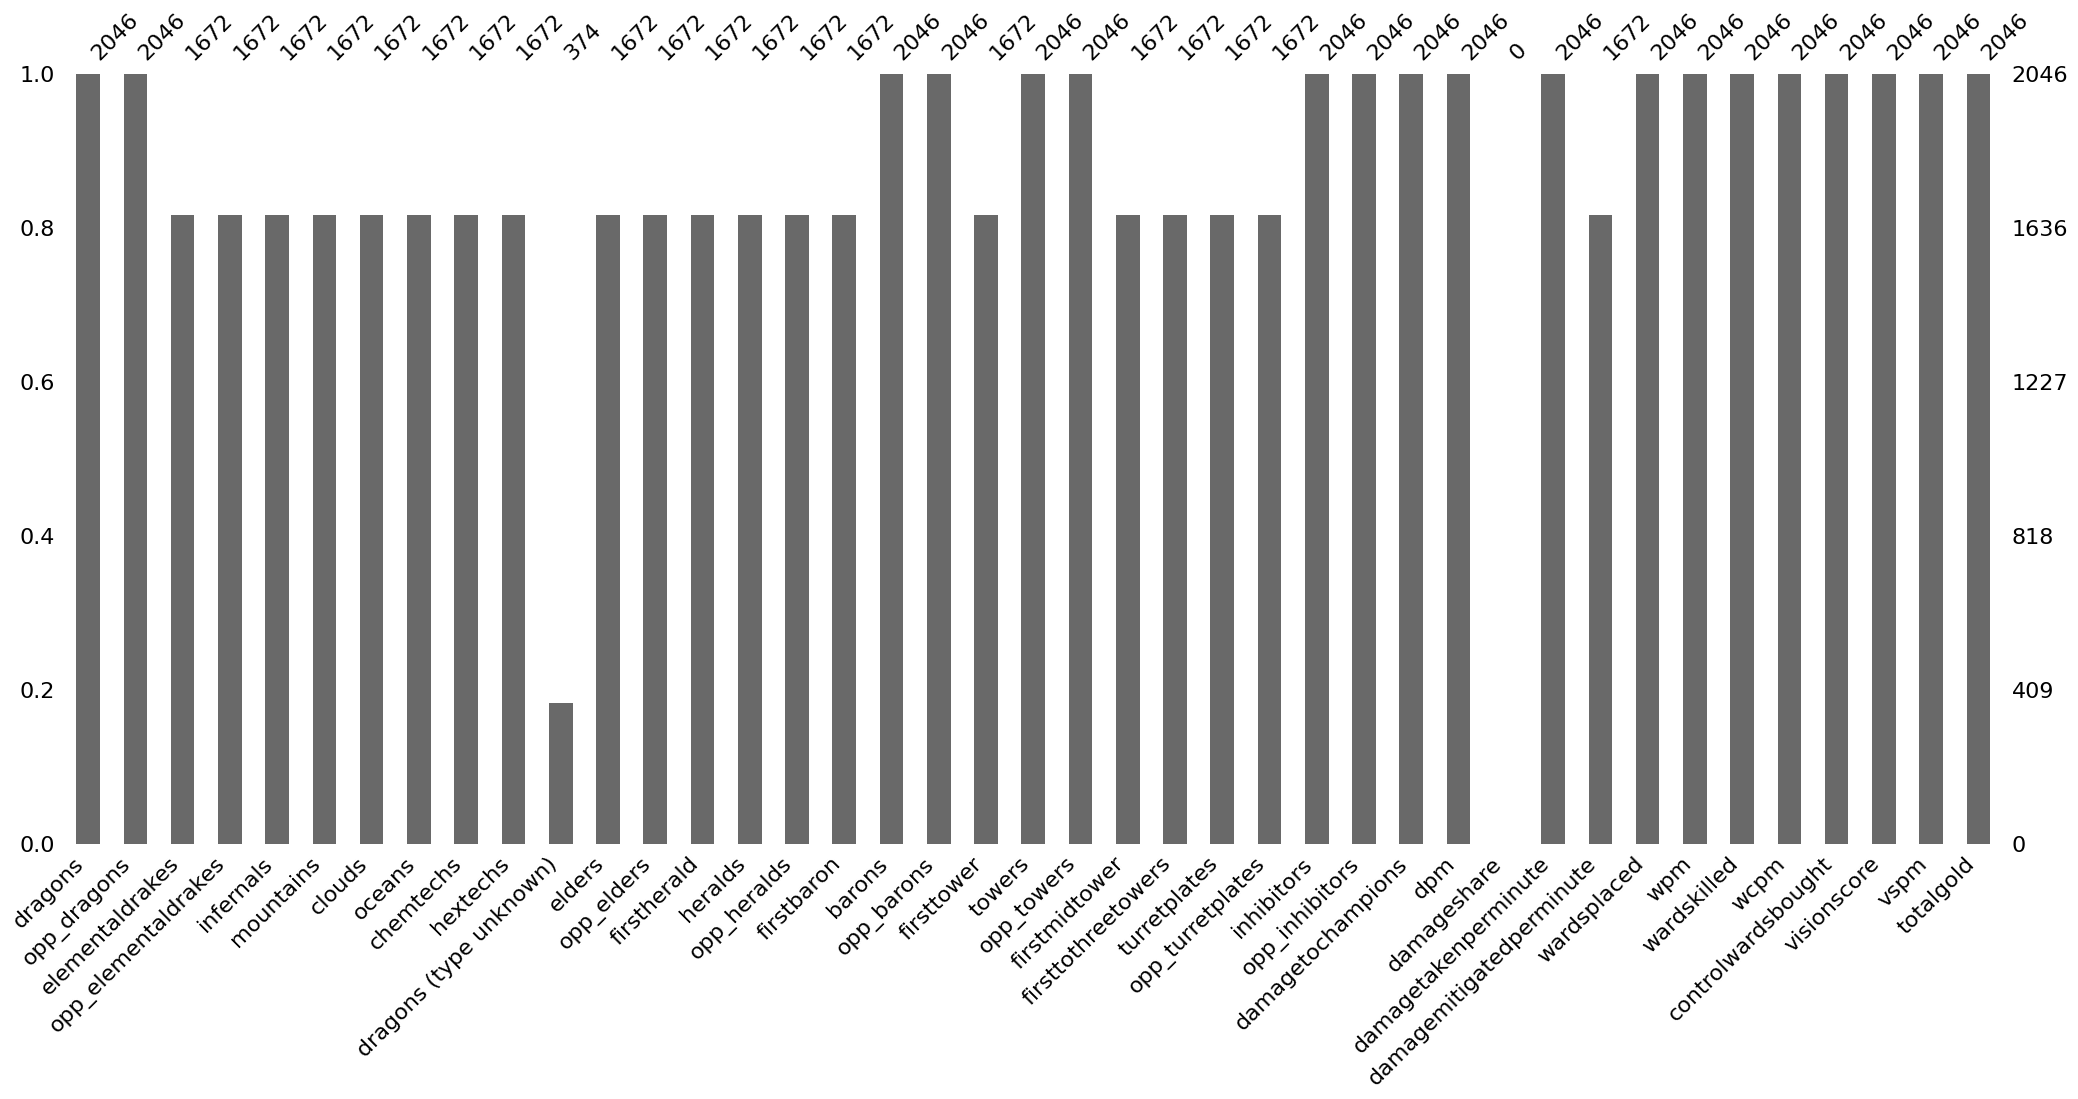

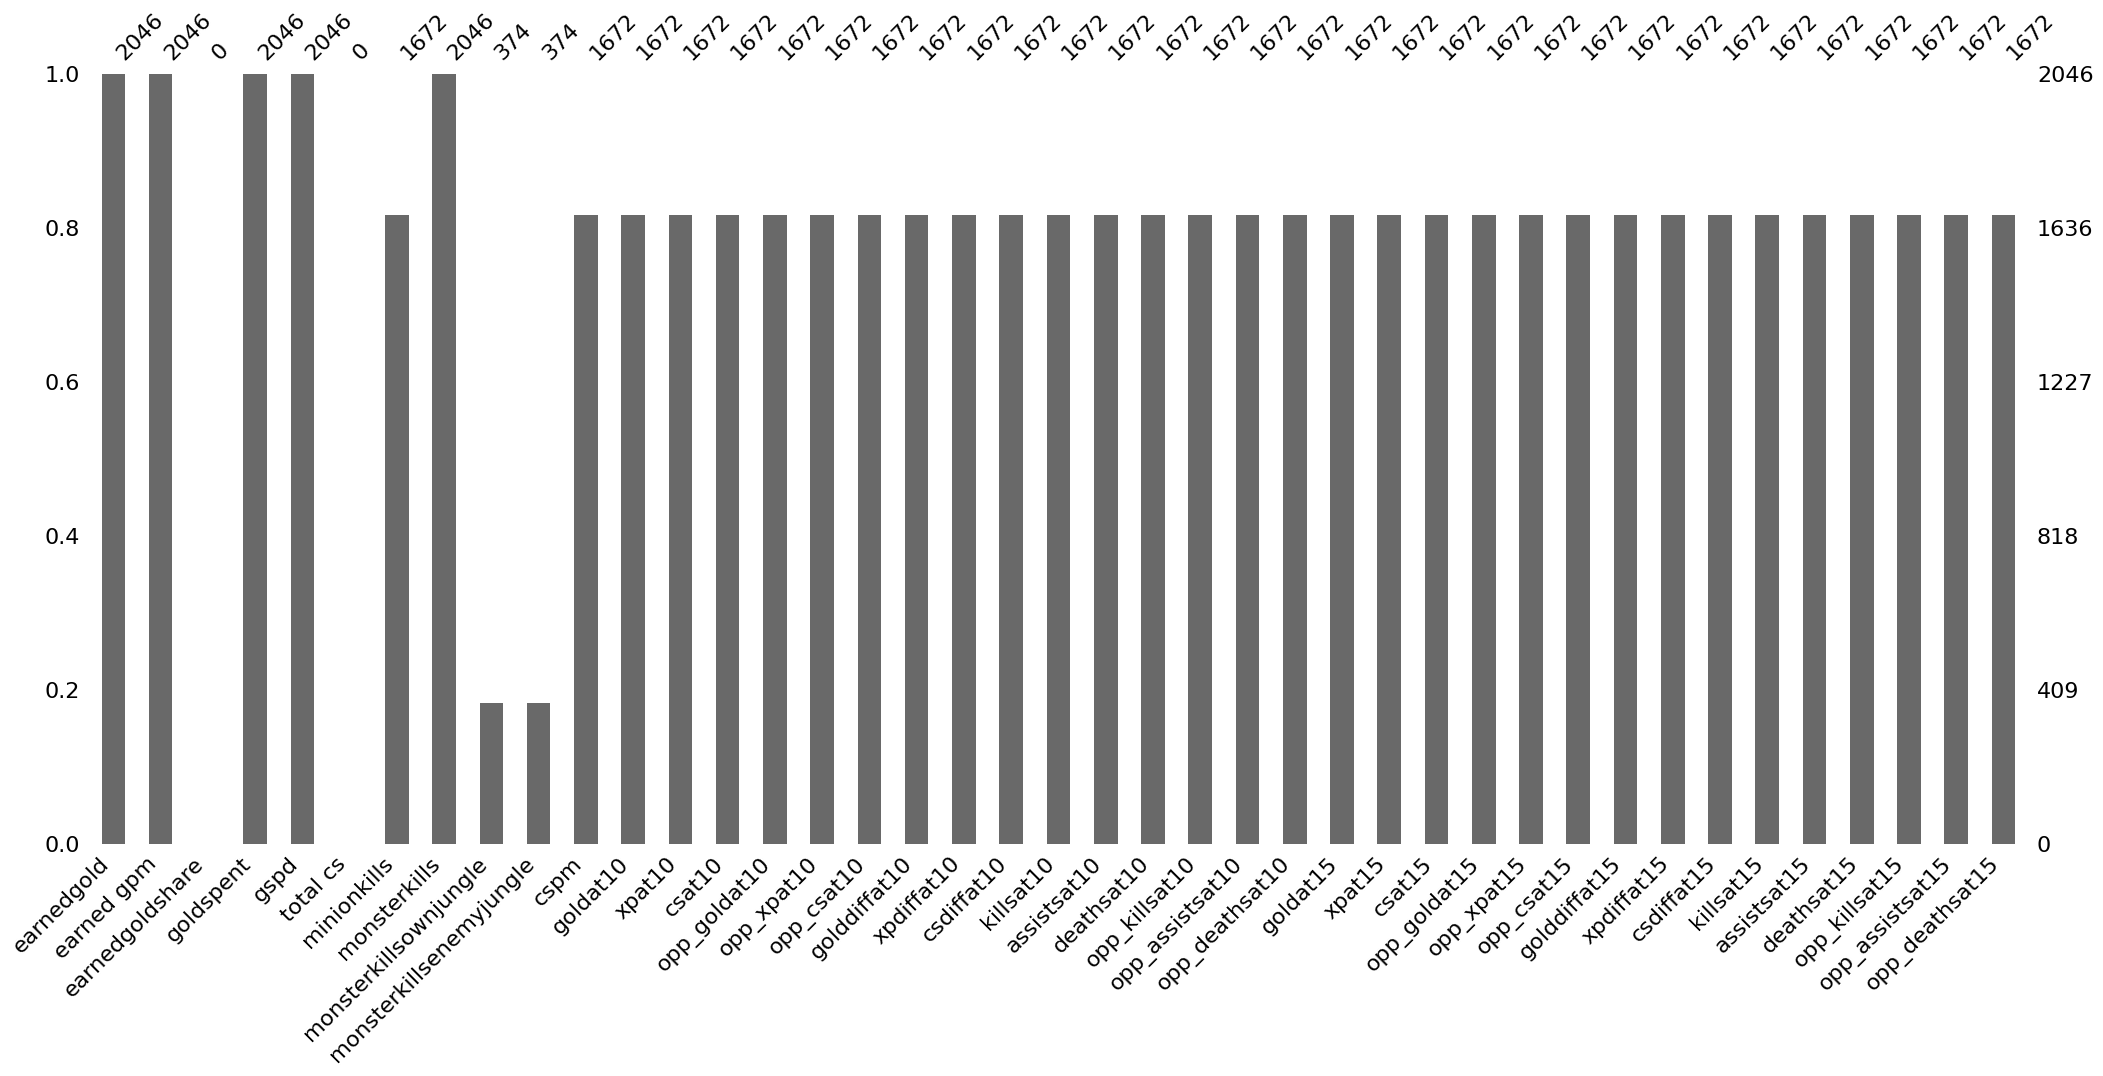

In [100]:
msno.bar(df_teams.iloc[:, 0:41])
plt.show()
msno.bar(df_teams.iloc[:, 41:82])
plt.show()
msno.bar(df_teams.iloc[:, 82:])
plt.show()

Apparently some data was only included for the agregate rows, thats good because from now on I'll be only using those and it turns out that there is no need to impute anythin for example for "towers" column

Now, lets make the dataset a little bit smaller by selecting only the colums that could prove usefull when modeling the future outcome of the match. Im droping the columns that basically represent the same thing such as Kills and Deaths (I'm going to drop the Deaths in this case)

I'm also going to drop most of the metadata colums besides "side" and "teamname" as they will prove usefull in the future for the data transformation

In [101]:
df_teams = df_teams[['side', 'teamname', 'team kpm', 'dragons', 'barons', 'towers', 'dpm', 'vspm', 'earned gpm','wcpm','cspm', 'xpat15', 'goldat15', 'result']]
df_teams = df_teams.reset_index()
df_teams.drop(columns='index', inplace=True)
df_teams.head(20)

,side,teamname,team kpm,dragons,barons,towers,dpm,vspm,earned gpm,wcpm,cspm,xpat15,goldat15,result
0,Blue,LNG Esports,0.0954,2.0,0.0,2.0,1329.8303,7.9533,931.8770,1.8770,NaN,NaN,NaN,0
1,Red,Rare Atom,0.5090,3.0,2.0,9.0,1811.5164,8.8123,1308.2291,1.5589,NaN,NaN,NaN,1
2,Blue,LNG Esports,0.0942,0.0,0.0,2.0,1708.6970,7.4097,900.5338,1.4757,NaN,NaN,NaN,0
3,Red,Rare Atom,0.5338,4.0,1.0,9.0,1974.8195,9.8587,1342.3234,1.7582,NaN,NaN,NaN,1
4,Blue,LNG Esports,0.9517,2.0,1.0,10.0,2747.7190,7.3414,1640.8459,1.5861,NaN,NaN,NaN,1
5,Red,Rare Atom,0.1360,1.0,0.0,0.0,1568.8822,6.1631,717.2356,0.7251,NaN,NaN,NaN,0
6,Blue,Rare Atom,0.5020,2.0,1.0,10.0,2013.8976,8.8583,1330.0394,1.6831,NaN,NaN,NaN,1
7,Red,LNG Esports,0.2657,4.0,0.0,3.0,1569.9803,7.7657,996.2008,1.9783,NaN,NaN,NaN,0
8,Blue,JD Gaming,0.6021,4.0,0.0,7.0,3112.2251,10.0262,1231.8325,1.8063,NaN,NaN,NaN,1
9,Red,Top Esports,0.5236,2.0,1.0,4.0,3221.6754,10.1309,1132.0681,2.1466,NaN,NaN,NaN,0


In [102]:
for i in range(2, 5):
    df_teams.iloc[:, -i].fillna(df_teams.iloc[:, -i].mean(), inplace= True)
df_teams.head()

C:\Users\Jakub\AppData\Local\Temp\ipykernel_7744\32109295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_teams.iloc[:, -i].fillna(df_teams.iloc[:, -i].mean(), inplace= True)


,side,teamname,team kpm,dragons,barons,towers,dpm,vspm,earned gpm,wcpm,cspm,xpat15,goldat15,result
0,Blue,LNG Esports,0.0954,2.0,0.0,2.0,1329.8303,7.9533,931.8770,1.8770,32.543244,29876.795455,25044.644737,0
1,Red,Rare Atom,0.5090,3.0,2.0,9.0,1811.5164,8.8123,1308.2291,1.5589,32.543244,29876.795455,25044.644737,1
2,Blue,LNG Esports,0.0942,0.0,0.0,2.0,1708.6970,7.4097,900.5338,1.4757,32.543244,29876.795455,25044.644737,0
3,Red,Rare Atom,0.5338,4.0,1.0,9.0,1974.8195,9.8587,1342.3234,1.7582,32.543244,29876.795455,25044.644737,1
4,Blue,LNG Esports,0.9517,2.0,1.0,10.0,2747.7190,7.3414,1640.8459,1.5861,32.543244,29876.795455,25044.644737,1


In [103]:
df_teams.isna().sum()

side          0
teamname      0
team kpm      0
dragons       0
barons        0
towers        0
dpm           0
vspm          0
earned gpm    0
wcpm          0
cspm          0
xpat15        0
goldat15      0
result        0
dtype: int64

OUTLIERS

I will not tackle outliers now as it would mess up the proces of pairing rows, they will be taken care of later

That's all for the data cleaning part, now let's move to the data transformation

In [104]:

df_teams.to_csv('teams_data.csv')